<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/ML_node/ML_with_Python_Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6. 지도학습(회귀)**
1. Linear regression
2. Ridge regression
3. Lasso regression
4. Elastic-net regression
5. Random Forest & XGBoost
6. Hyperparameter Tuning
7. Evaluation(Regression)

**1. Linear regression 선형회귀**
* Linear regression
    * Simple Linear regression 단순 선형 회귀: 독립변수(피처)가 1개
    * Multiple Linear regression 다중 선형 회귀: 독립변수(피처)가 2개
* Cost function 비용함수
    * Loss fucntion 손실함수, Objective fuction 목적함수
    * error 오차를 계산(실제값과 예측값 차이)
    * 평균 제곱 오차를 최소화하는 파라미터를 찾음
* Gradient Descent 경사하강법
    * 경사하강법을 활용해 최소 에러값을 찾음

In [1]:
#data load
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#generate data
from sklearn.datasets import load_diabetes
def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [3]:
#train data samples
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [4]:
#target samples
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

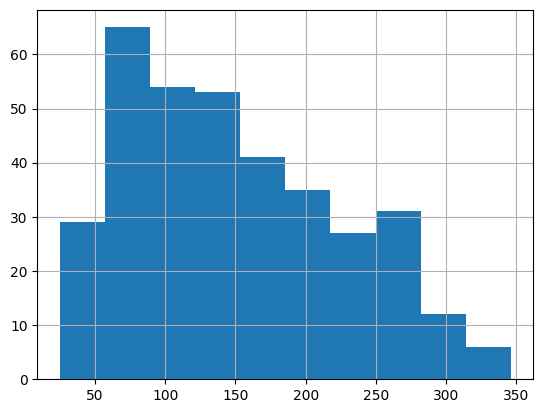

In [5]:
#cheack target
y_train.hist()

In [6]:
#Linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2707.6318521641583

**2. Ridge regression**
* 회귀를 위한 선형 모델
* Regularization
    * 오버피팅 방지
    * 규제방식: L2 규제
    * 파라미터(alpha) 값을 활용하여 조절
    * alpha 값이 커질수록 회귀 계수 값을 작게 만든다
        * ex. Y=W1*X1 + W2*X2 + W3*X3 ... Wn*Wn
        * 회귀계수: W, 피처(변수): X

In [7]:
#Ridge regression model
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3522.1191842072667

In [8]:
#regression coefficient 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [9]:
#Ridge regression (alpha=10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.884843903383

In [10]:
#regression coefficient (alpha=10)
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [13]:
#Ridge regression (alpha=0.05)
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

# Ridge regression (alpha=0.1), 2744.899739917671

2699.6595785438317

In [14]:
#regression coefficient (alpha=0.1)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.1,alpha0.05
age,31.293421,16.703166,4.275162,-0.508850
sex,-71.448655,-1.796418,-205.210484,-223.345659
bmi,267.605962,61.026376,450.909749,469.447848
bp,197.362492,47.434846,331.923682,348.368885
s1,14.613257,18.491238,-84.311149,-146.952481
s2,-13.884237,13.440104,-54.662514,-18.297550
s3,-124.649836,-35.542087,-158.706512,-141.658486
s4,106.212967,38.896140,114.066890,115.860926
s5,221.068493,55.276290,391.231834,432.508101
s6,101.202546,35.868345,78.555458,69.578796


**3. Lasso regression**
* 회귀를 위한 선형 모델
* Regularization
    * 오버피팅 방지
    * 규제방식: L1 규제
    * L2규제에 비해 회귀 계수를 급격하게 감소시켜 0으로 만든다
    * L1규제는 중요한 피처만 선택하는 특성이 있음

In [15]:
#Lasso regression model
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.152642946343

In [16]:
#regression coefficient 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [17]:
#Lasso regression (alpha=2)
model = Lasso(alpha=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179449031

In [18]:
#regression coefficient (alpha=2)
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [19]:
#Lasso regression (alpha=0.05)
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4583679188177

In [20]:
#regression coefficient (alpha=0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


**4. Elastic-net regression**
* 회귀를 위한 선형 모델
* L2규제와 L1규제를 결합한 회귀
* 상대적으로 시간이 오래 걸림

In [21]:
#Elastic-net regression model
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270961171604

In [22]:
#Elastic-net regression model (alpha=0.0001)
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6031657225312

**5. Random Forest & XGBoost**

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Random Forest")
print(mean_squared_error(y_test, pred))

Random Forest
3168.4931651685392


In [25]:
#XGBoost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("XGBoost")
print(mean_squared_error(y_test, pred))

XGBoost
4265.475533439266


**6. Hyperparameter Tuning**

In [26]:
#lib
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
#Hyperparameter
params={'learning_rate':[0.07, 0.05],
        'max_depth':[3, 5, 7],
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]}

In [28]:
#dataset load
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

**GridSearchCV**

In [29]:
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [30]:
#최적의 Hyperparameter
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [31]:
#Hyperparameter Tuning
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3020.722217577996

**Random Search**

In [32]:
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [33]:
#최적의 Hyperparameter
grid.best_params_

{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}

**7. Evaluation(Regression)**

In [34]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

46.60036254197024

In [35]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3020.722217577996

In [36]:
#RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

54.96109731053408

In [37]:
#RMSLE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.423941373573131

In [38]:
#R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5386462845667569